# 1. The Gibbs formation energy of oxides
By Kejiang Li of USTB

Contact: likejiang@ustb.edu.cn

Updated: March 9, 2024

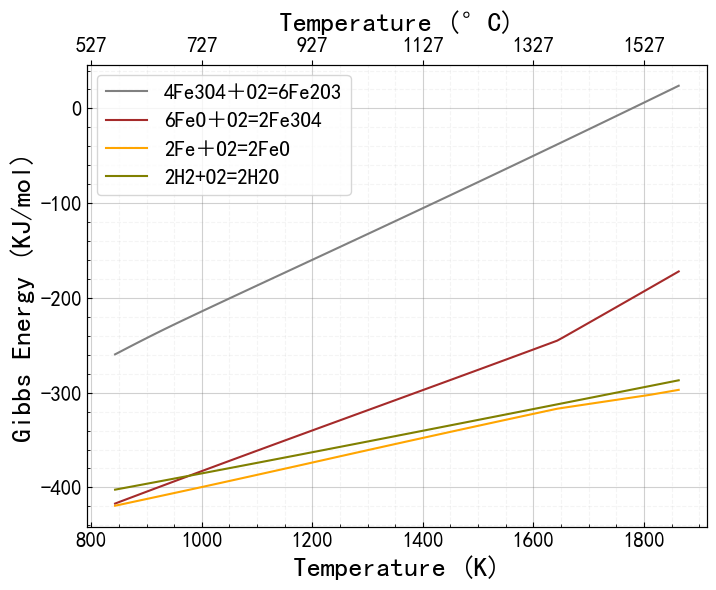

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ThermodynamicsData

Data=ThermodynamicsData.ThermodynamicsData()
colorSel=["grey", "brown", "orange", "olive", "green", "cyan", "blue", "purple", "pink", "red", "darkgreen", "lime", "royalblue", "navy", "darkmagenta", "crimson", "tomato", "olivedrab"]

T=np.arange(843.0,1873.0,10) # Temperature in K

#4Fe3O4 ＋ O2 = 6Fe2O3 
Fe2O3gibbs = [(6*Data.Fe2O3gibbs(x)-4*Data.Fe3O4gibbs(x)-Data.O2gibbs(x))/1000 for x in T]
#6FeO  ＋ O2 = 2Fe3O4       
Fe3O4gibbs = [(2*Data.Fe3O4gibbs(x)-6*Data.FeOgibbs(x)-Data.O2gibbs(x))/1000 for x in T]
#2Fe  ＋ O2  =  2FeO        
FeOgibbs = [(2*Data.FeOgibbs(x)-2*Data.Fegibbs(x)-Data.O2gibbs(x))/1000 for x in T]
#2H2+O2=2H2O
H2Ogibbs = [(2*Data.H2Ogibbs(x)-2*Data.H2gibbs(x)-Data.O2gibbs(x))/1000 for x in T]

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文字体

ax.plot(T,Fe2O3gibbs,color=colorSel[0],label='4Fe3O4＋O2=6Fe2O3')
ax.plot(T,Fe3O4gibbs,color=colorSel[1],label='6FeO＋O2=2Fe3O4')
ax.plot(T,FeOgibbs,color=colorSel[2],label='2Fe＋O2=2FeO')
ax.plot(T,H2Ogibbs,color=colorSel[3],label='2H2+O2=2H2O')

#plt.xlim(0,1)
#plt.ylim(0,900)

plt.xlabel("Temperature (K)", fontsize=20)
plt.ylabel("Gibbs Energy (KJ/mol)", fontsize=20)

# Show the major grid lines with dark grey lines
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.3)
# Position the major ticks inside
plt.tick_params(which='major', direction='in')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.1)
# Position the minor ticks inside
plt.tick_params(which='minor', direction='in')

# Increase the tick label font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show legend outside of the plot on the right
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(fontsize=15)

# Create a new x-axis on the top which shares the y-axis
ax2 = ax.twiny()
# Set the ticks and labels for the new x-axis
ax2.set_xticks(ax.get_xticks())  # Use the same x-ticks as ax1
ax2.set_xbound(ax.get_xbound())  # Use the same x-bounds as ax1
Tc=list(map(lambda c: c-273.15, ax.get_xticks())) # Temperature in C
ax2.set_xticklabels(["{:.0f}".format(t) for t in Tc],fontsize=15)  # Set the labels to the calculated Celsius temperatures
# Set the label for the new x-axis
ax2.set_xlabel("Temperature (°C)", fontsize=20)

plt.show()
plt.close()

# 2. The Fe-C-H-O diagram for ironmaking
By Kejiang Li of USTB, likejiang@ustb.edu.cn, March 6, 2024

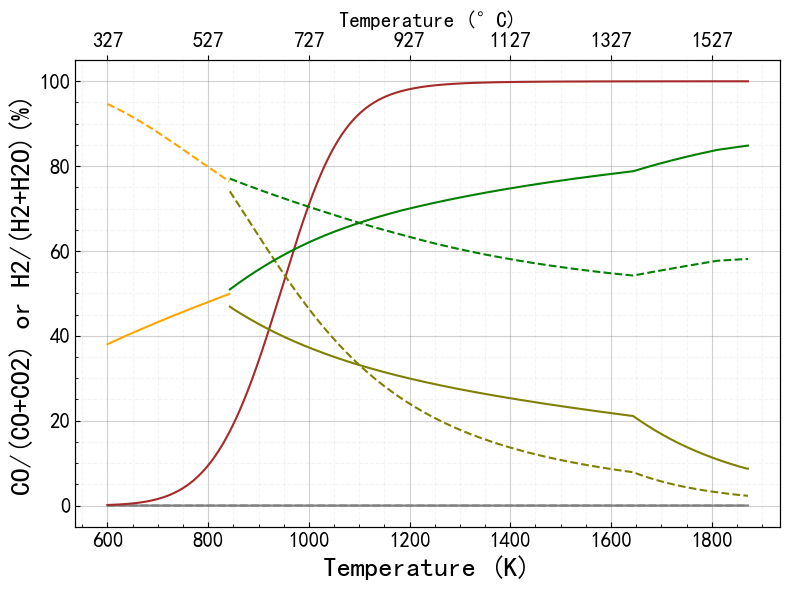

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ThermodynamicsData

Data=ThermodynamicsData.ThermodynamicsData()
colorSel=["grey", "brown", "orange", "olive", "green", "cyan", "blue", "purple", "pink", "red", "darkgreen", "lime", "royalblue", "navy", "darkmagenta", "crimson", "tomato", "olivedrab"]

R=8.314

T=np.arange(600.0,1873.0,1.0) # Temperature in K

(CO_Fe2O3_Fe3O4, CO_Fe3O4_Fe, CO_Fe3O4_FeO, CO_FeO_Fe, H2_Fe2O3_Fe3O4, H2_Fe3O4_Fe, H2_Fe3O4_FeO, H2_FeO_Fe, Temp_below_843, Temp_above_843, CO_CO2_CO) = ([] for _ in range(11))

for temp in T:
    #print(temp)
    #3Fe2O3(s)+CO-->2Fe3O4(s)+CO2
    Gibbs=Data.Fe3O4gibbs(temp)*2+Data.CO2gibbs(temp)-Data.Fe2O3gibbs(temp)*3-Data.COgibbs(temp)
    CO_Fe2O3_Fe3O4.append(1/(1+math.exp(-Gibbs/(R*temp))))
    #3Fe2O3(s)+H2-->2Fe3O4(s)+H2O
    Gibbs=Data.Fe3O4gibbs(temp)*2+Data.H2Ogibbs(temp)-Data.Fe2O3gibbs(temp)*3-Data.H2gibbs(temp)
    H2_Fe2O3_Fe3O4.append(1/(1+math.exp(-Gibbs/(R*temp))))
    #CO2+C-->2CO
    Gibbs=Data.COgibbs(temp)*2-Data.CO2gibbs(temp)-Data.Cgibbs(temp)
    b=math.exp(-Gibbs/(R*temp))
    CO_CO2_CO.append((-b+math.sqrt(b**2+4*b))/2*100)

    if(temp<843): #K
        Temp_below_843.append(temp)  #作为坐标的K
        #(1/4)Fe3O4(s)+CO-->(3/4)Fe(s)+CO2
        Gibbs=Data.Fegibbs(temp)*(3/4)+Data.CO2gibbs(temp)-Data.Fe3O4gibbs(temp)*(1/4)-Data.COgibbs(temp)
        CO_Fe3O4_Fe.append(100/(1+math.exp(-Gibbs/(R*temp))))
        #(1/4)Fe3O4(s)+H2-->(3/4)Fe(s)+H2O
        Gibbs=Data.Fegibbs(temp)*(3/4)+Data.H2Ogibbs(temp)-Data.Fe3O4gibbs(temp)*(1/4)-Data.H2gibbs(temp)
        H2_Fe3O4_Fe.append(100/(1+math.exp(-Gibbs/(R*temp))))

    elif(temp>=843): #K
        Temp_above_843.append(temp)   #作为坐标的K
        #Fe3O4(s)+CO-->3FeO(s)+CO2
        Gibbs=Data.FeOgibbs(temp)*3+Data.CO2gibbs(temp)-Data.Fe3O4gibbs(temp)-Data.COgibbs(temp)
        CO_Fe3O4_FeO.append(100/(1+math.exp(-Gibbs/(R*temp))))
        #Fe3O4(s)+H2-->3FeO(s)+H2O
        Gibbs=Data.FeOgibbs(temp)*3+Data.H2Ogibbs(temp)-Data.Fe3O4gibbs(temp)-Data.H2gibbs(temp)
        H2_Fe3O4_FeO.append(100/(1+math.exp(-Gibbs/(R*temp))))

        #FeO(s)+CO-->Fe(s)+CO2
        Gibbs=Data.Fegibbs(temp)+Data.CO2gibbs(temp)-Data.FeOgibbs(temp)-Data.COgibbs(temp)
        CO_FeO_Fe.append(100/(1+math.exp(-Gibbs/(R*temp))))

        #FeO(s)+H2-->Fe(s)+H2O
        Gibbs=Data.Fegibbs(temp)+Data.H2Ogibbs(temp)-Data.FeOgibbs(temp)-Data.H2gibbs(temp)
        H2_FeO_Fe.append(100/(1+math.exp(-Gibbs/(R*temp))))

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文字体
ax.plot(T,CO_Fe2O3_Fe3O4,color=colorSel[0],label='3Fe2O3(s)+CO-->2Fe3O4(s)+CO2')
ax.plot(T,H2_Fe2O3_Fe3O4,color=colorSel[0],linestyle='--',label='3Fe2O3(s)+H2-->2Fe3O4(s)+H2O')
ax.plot(T,CO_CO2_CO,color=colorSel[1],label='CO2+C-->2CO')
ax.plot(Temp_below_843,CO_Fe3O4_Fe,color=colorSel[2],label='(1/4)Fe3O4(s)+CO-->(3/4)Fe(s)+CO2')
ax.plot(Temp_below_843,H2_Fe3O4_Fe,color=colorSel[2],linestyle='--',label='(1/4)Fe3O4(s)+H2-->(3/4)Fe(s)+H2O')
ax.plot(Temp_above_843,CO_Fe3O4_FeO,color=colorSel[3],label='Fe3O4(s)+CO-->3FeO(s)+CO2')
ax.plot(Temp_above_843,H2_Fe3O4_FeO,color=colorSel[3],linestyle='--',label='Fe3O4(s)+H2-->3FeO(s)+H2O')
ax.plot(Temp_above_843,CO_FeO_Fe,color=colorSel[4],label='FeO(s)+CO-->Fe(s)+CO2')
ax.plot(Temp_above_843,H2_FeO_Fe,color=colorSel[4],linestyle='--',label='FeO(s)+H2-->Fe(s)+H2O')

plt.xlabel("Temperature (K)", fontsize=20)
plt.ylabel("CO/(CO+CO2) or H2/(H2+H2O)(%)", fontsize=20)

# Show the major grid lines with dark grey lines
plt.grid(visible=True, which='major', color='#666666', linestyle='-', alpha=0.3)
# Position the major ticks inside
plt.tick_params(which='major', direction='in')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='--', alpha=0.1)
# Position the minor ticks inside
plt.tick_params(which='minor', direction='in')
# Increase the tick label font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Show legend outside of the plot on the right
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.legend(fontsize=15)
# Create a new x-axis on the top which shares the y-axis
ax2 = ax.twiny()

# Set the ticks and labels for the new x-axis
ax2.set_xticks(ax.get_xticks())  # Use the same x-ticks as ax1
ax2.set_xbound(ax.get_xbound())  # Use the same x-bounds as ax1
Tc=list(map(lambda c: c-273.15, ax.get_xticks())) # Temperature in C
ax2.set_xticklabels(["{:.0f}".format(t) for t in Tc],fontsize=15)  # Set the labels to the calculated Celsius temperatures

# Set the label for the new x-axis
ax2.set_xlabel("Temperature (°C)", fontsize=15)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()
plt.close()